#### About
Turkiye Student Evaluation Analysis.
Dataset - https://www.kaggle.com/datasets/yatishbn/uci-turkiye-student-evaluation-data-set

In [23]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
dataset_path = "/home/suraj/ClickUp/Mar-Apr/data/turkiye-student-evaluation_generic.csv"

In [26]:
df = pd.read_csv(dataset_path)

In [27]:
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [29]:
df.drop_duplicates()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,3,13,2,3,4,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5814,3,13,1,2,4,1,1,1,1,1,...,2,1,1,2,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [30]:
#checking null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

<AxesSubplot:>

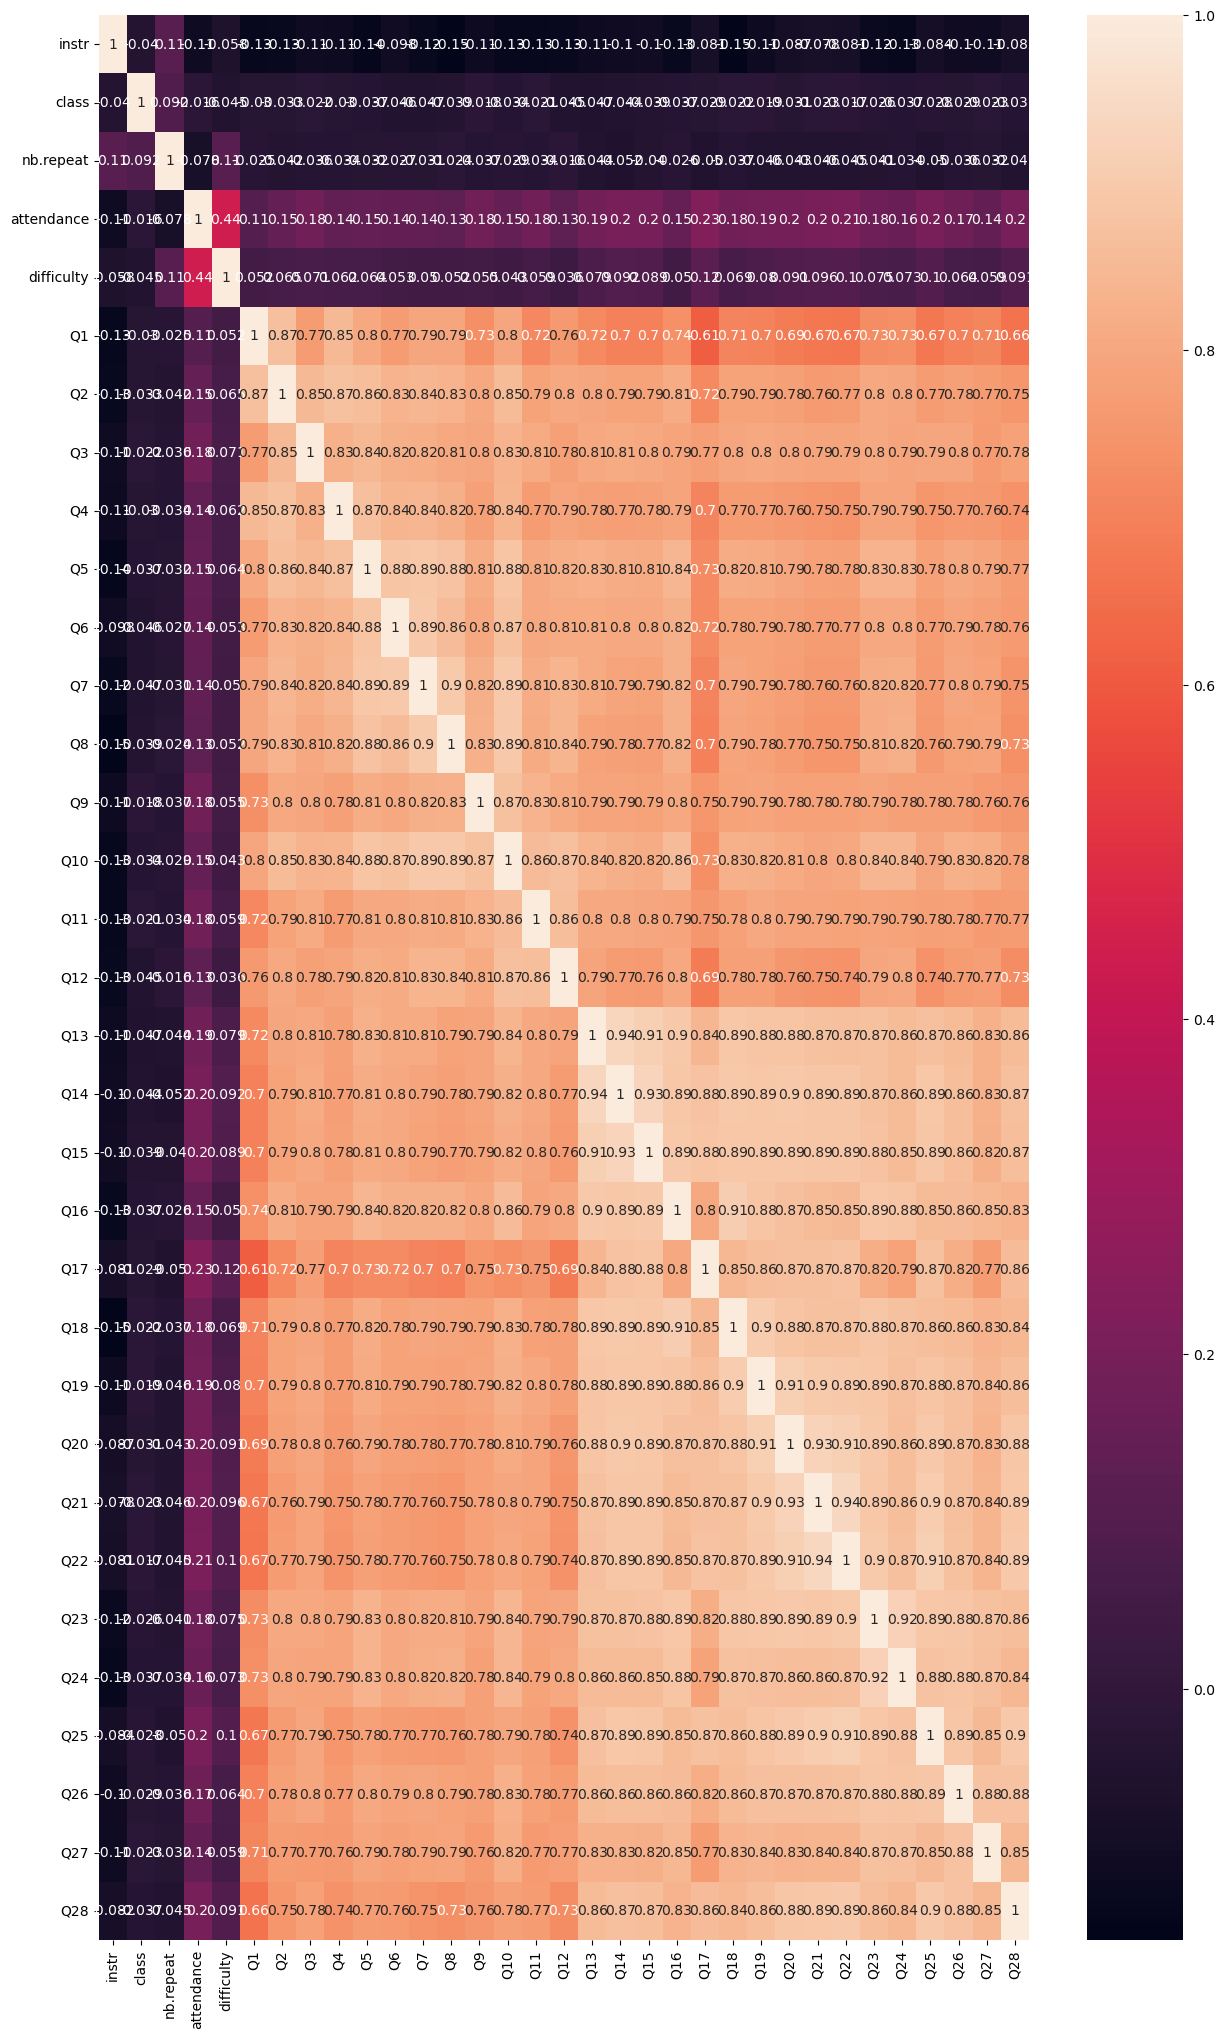

In [31]:
plt.subplots(figsize=(15,25))
sns.heatmap(df.corr(),annot=True)

In [33]:
# extracting only question columns
x = df.iloc[:,5:33]
x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
#applying PCA
pca = PCA(n_components=2) #reducing to two columns
x_pca = pca.fit_transform(x) 
x_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.4047942 ],
       [11.56931918,  0.4047942 ]])

In [35]:
print("Data distribution:", pca.explained_variance_ratio_) 
print("Data loss: ", 1-sum(pca.explained_variance_ratio_))

Data distribution: [0.82198145 0.04515671]
Data loss:  0.1328618321108912


In [39]:
#using elbow method and k means clustering (https://www.kaggle.com/code/satoru90/turkey-student-evaluation-data-set-clustering)

allscore = []
allclusters = []
distances = []

# Score change according to cluster
def clust(n):
    
    for i in range(1,n+1):
        i=i+1
        # fit and predict model for range of clusters
        model=KMeans(n_clusters=i)
        model=model.fit(x_pca)
        pred=model.predict(x_pca)
        score=silhouette_score(x_pca,pred)
        distance=model.inertia_
        print("Cluster",i, "score:", score)
        # add the scores and distances to the lists
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)
clust(15) # call function wit 10 clusters

Cluster 2 score: 0.5285326544756641
Cluster 3 score: 0.5732018765736554
Cluster 4 score: 0.6002921270552432
Cluster 5 score: 0.6301181385143781
Cluster 6 score: 0.6515861838517332
Cluster 7 score: 0.6568363599718976
Cluster 8 score: 0.6665454188216934
Cluster 9 score: 0.6605746807046531
Cluster 10 score: 0.6610982252971873
Cluster 11 score: 0.667217141001892
Cluster 12 score: 0.6683767135741082
Cluster 13 score: 0.6748987699774286
Cluster 14 score: 0.6743538745035946
Cluster 15 score: 0.6770224852485797
Cluster 16 score: 0.67785185006506


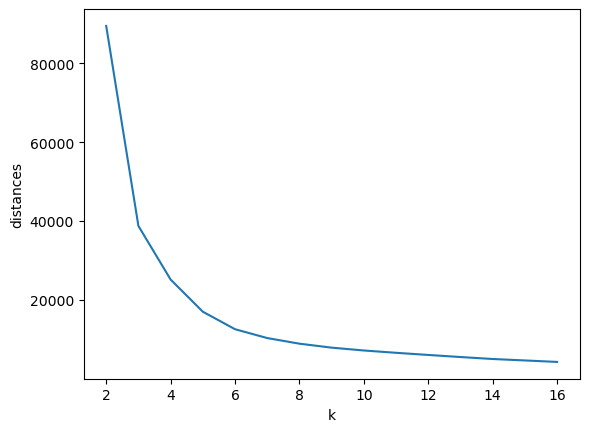

In [40]:
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters,distances);

In [41]:
# elbow is 3 hence using n_clusters=3 to predict
model = KMeans(n_clusters=3)
model = model.fit(x_pca)
pred = model.predict(x_pca)
print("silhouette_score", silhouette_score(x_pca,pred))

silhouette_score 0.5733110871444312
